In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Input, Convolution2D, MaxPooling2D, Flatten, Dense,Dropout
from keras.utils import np_utils
import tensorflow as tf

Using TensorFlow backend.


In [2]:
x = pd.read_csv("Datasets/fashionmnist/fashion-mnist_test.csv")
X_ = np.array(x)
X = X_[:,1:]
X = X/255.0
y = X_[:,0]
print(X.shape,y.shape)

(10000, 784) (10000,)


In [3]:
np.unique(y,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]))

In [4]:
X_train = X.reshape((-1,28,28,1))
Y_train = np_utils.to_categorical(y)

print(X_train.shape,Y_train.shape)

(10000, 28, 28, 1) (10000, 10)


In [5]:
import matplotlib.pyplot as plt

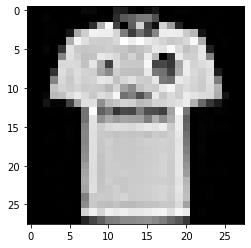

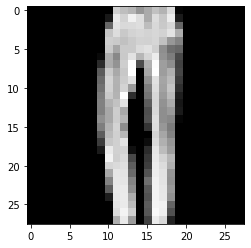

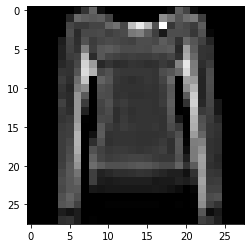

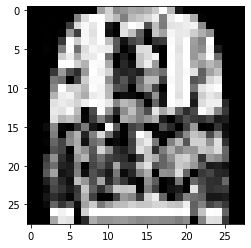

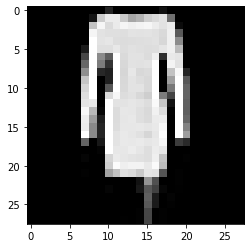

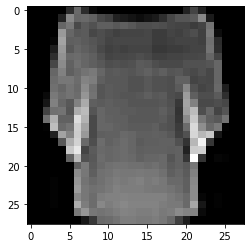

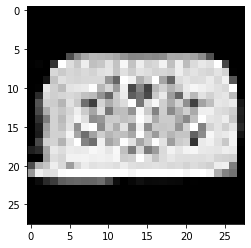

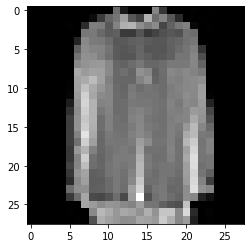

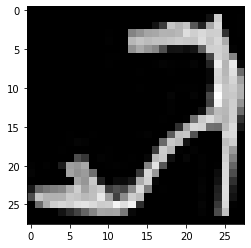

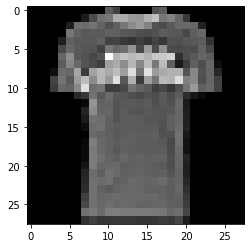

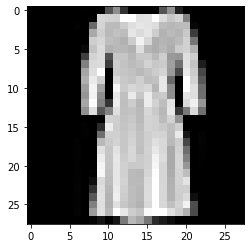

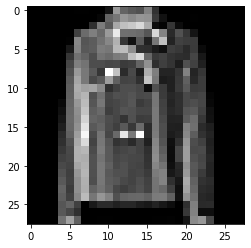

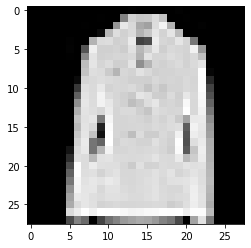

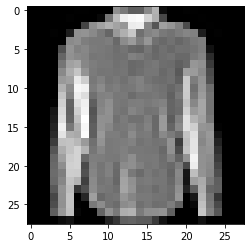

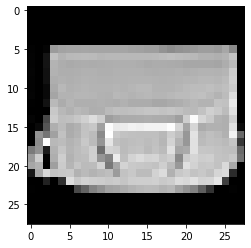

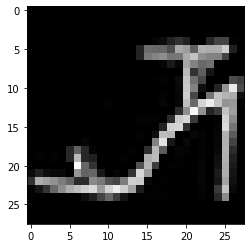

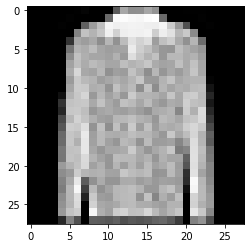

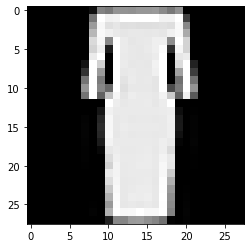

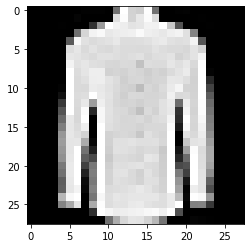

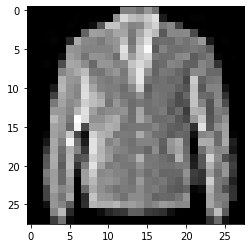

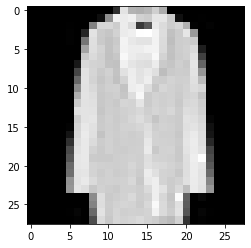

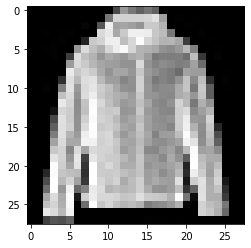

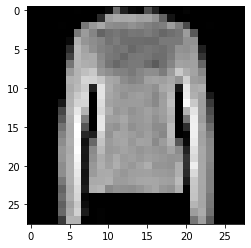

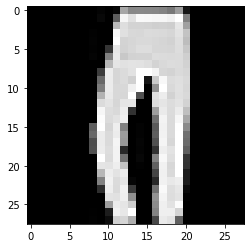

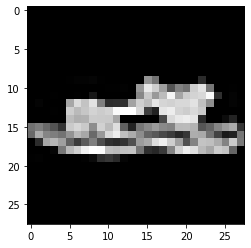

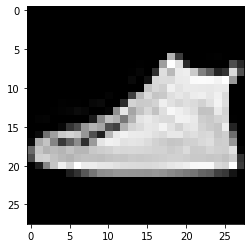

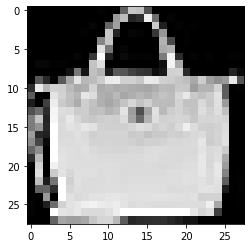

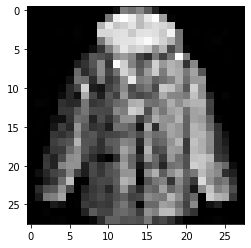

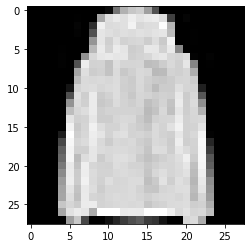

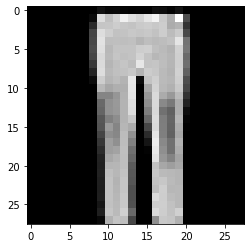

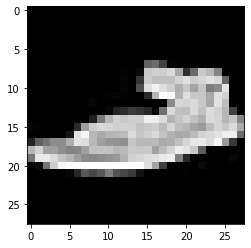

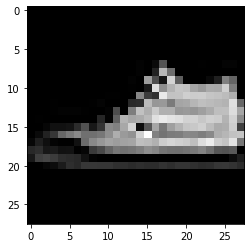

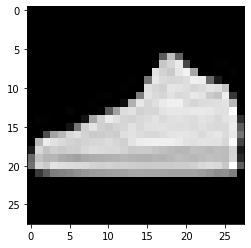

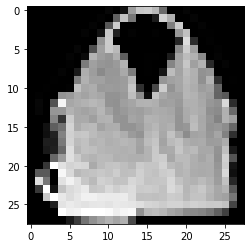

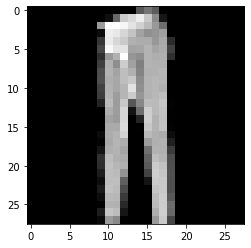

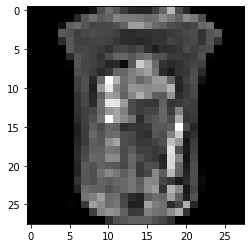

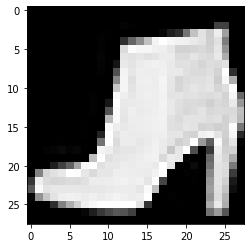

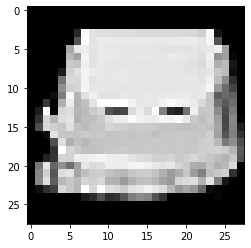

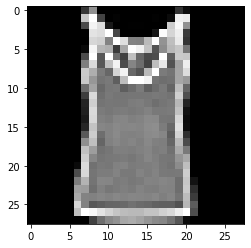

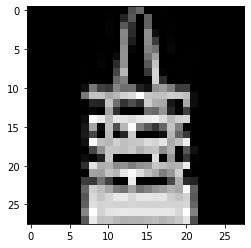

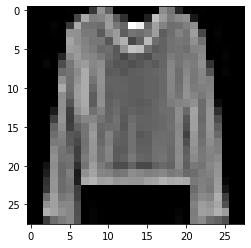

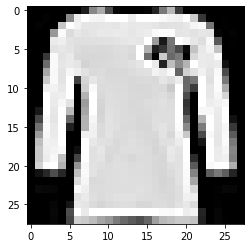

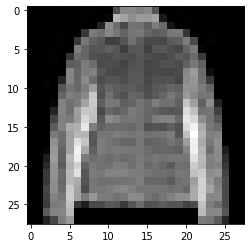

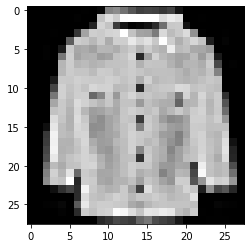

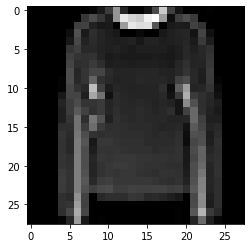

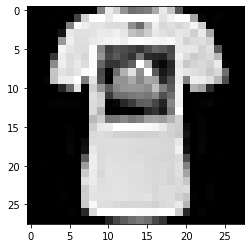

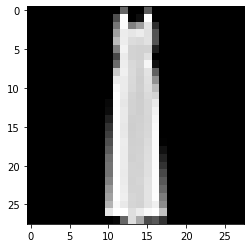

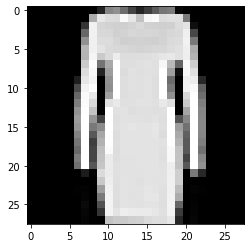

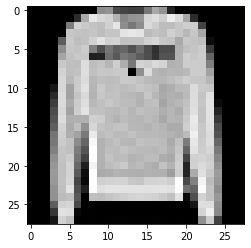

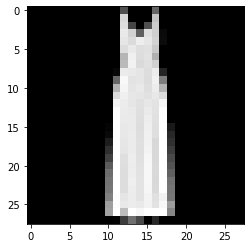

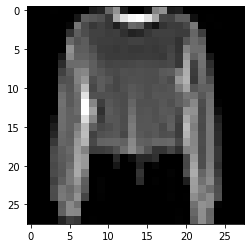

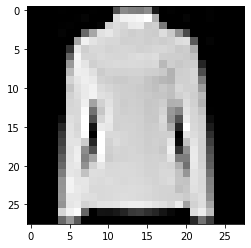

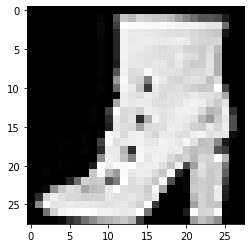

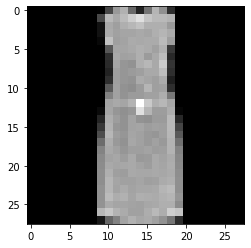

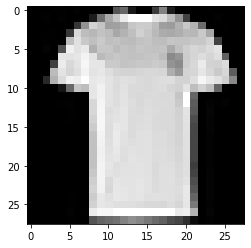

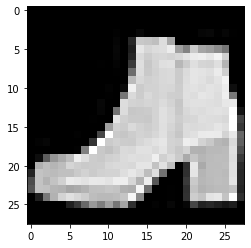

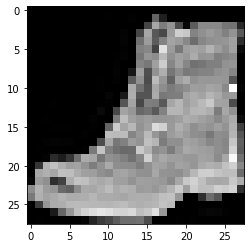

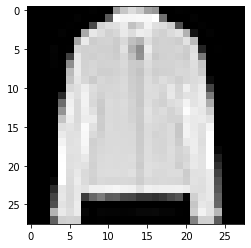

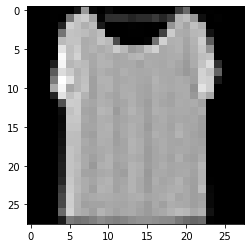

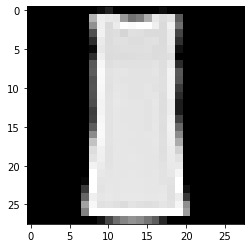

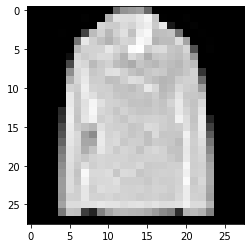

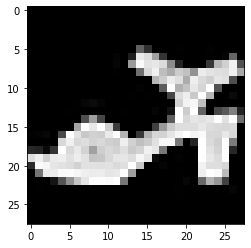

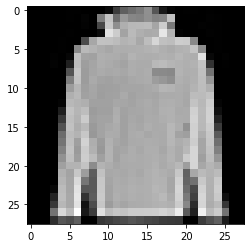

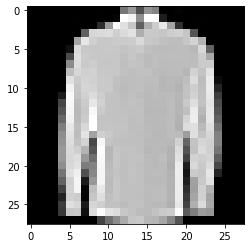

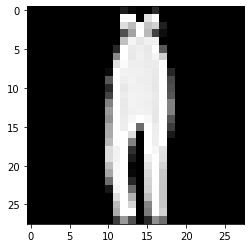

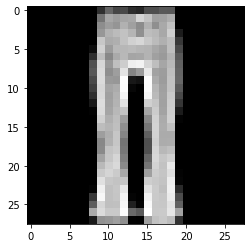

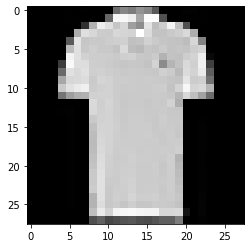

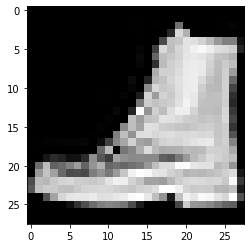

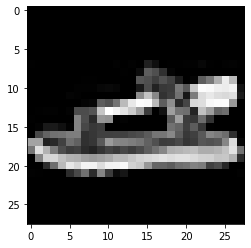

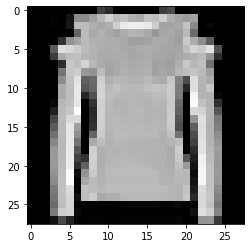

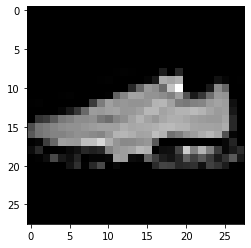

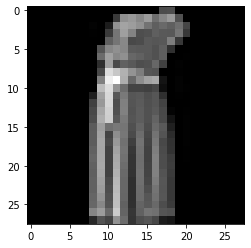

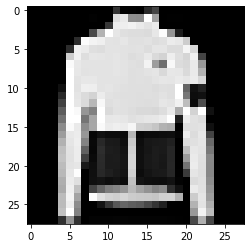

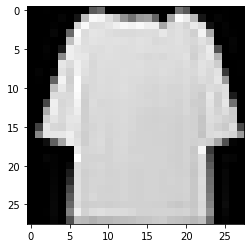

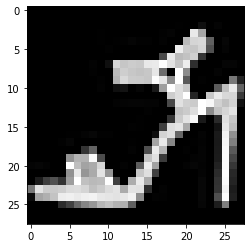

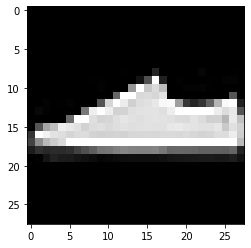

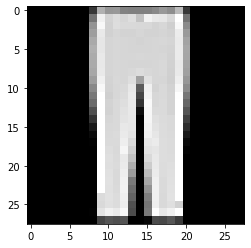

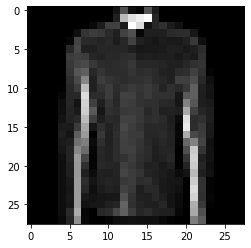

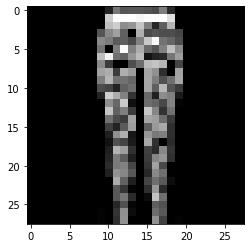

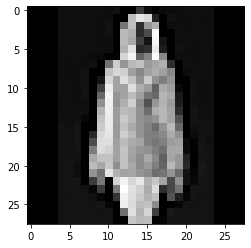

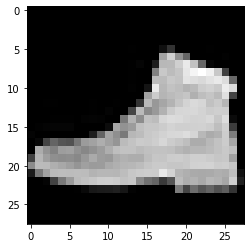

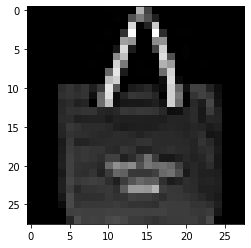

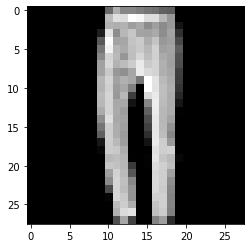

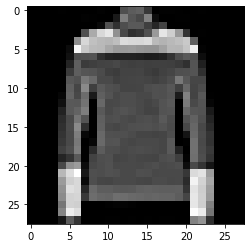

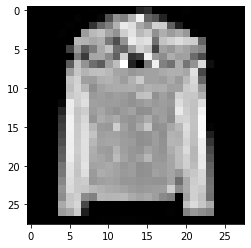

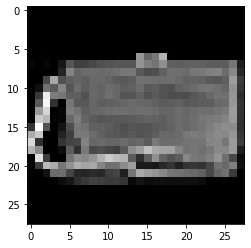

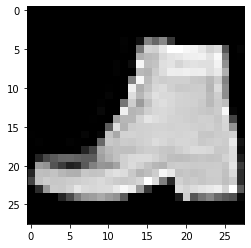

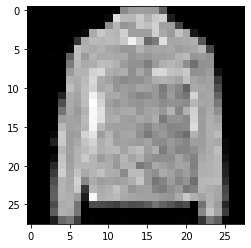

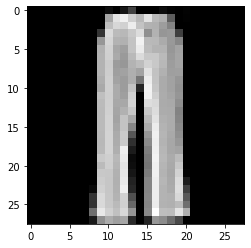

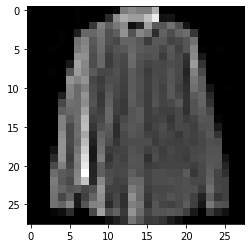

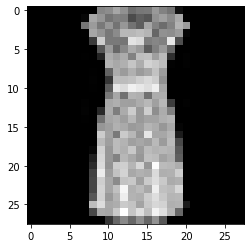

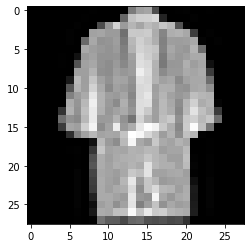

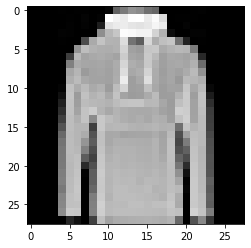

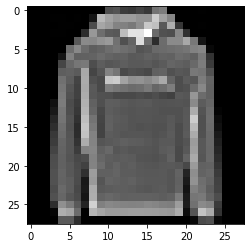

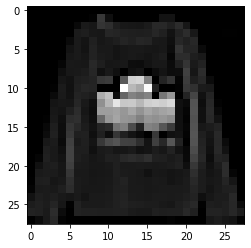

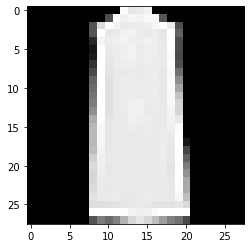

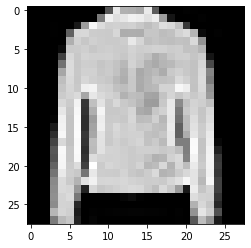

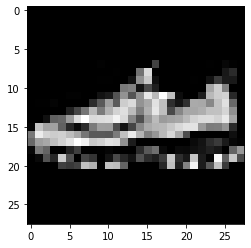

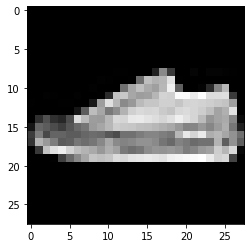

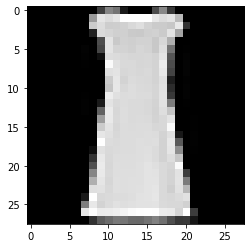

In [6]:
for i in range(100):
    plt.figure(i)
    plt.imshow(X_train[i].reshape((28,28)),cmap="gray")
    plt.show()

# CNN model

In [7]:
model = Sequential()
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(Convolution2D(64,(3,3),activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(32,(5,5),activation='relu'))

model.add(MaxPooling2D(2,2))
model.add(Convolution2D(64,(3,3),activation='relu'))
model.add(Flatten())

model.add(Dense(100,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 32)          51232     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 2, 2, 64)         

In [8]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [9]:
hist= model.fit(X_train,Y_train,epochs=20,shuffle=True,batch_size=16,validation_split=0.2)

Train on 8000 samples, validate on 2000 samples
Epoch 1/20
8000/8000 [==============================] - 14s 2ms/step - loss: 0.8077 - accuracy: 0.7011 - val_loss: 0.5777 - val_accuracy: 0.7785
Epoch 2/20
8000/8000 [==============================] - 12s 2ms/step - loss: 0.5011 - accuracy: 0.8124 - val_loss: 0.4525 - val_accuracy: 0.8280
Epoch 3/20
8000/8000 [==============================] - 12s 2ms/step - loss: 0.4052 - accuracy: 0.8450 - val_loss: 0.4193 - val_accuracy: 0.8460
Epoch 4/20
8000/8000 [==============================] - 13s 2ms/step - loss: 0.3461 - accuracy: 0.8710 - val_loss: 0.4044 - val_accuracy: 0.8620
Epoch 5/20
8000/8000 [==============================] - 14s 2ms/step - loss: 0.3078 - accuracy: 0.8840 - val_loss: 0.3654 - val_accuracy: 0.8760
Epoch 6/20
8000/8000 [==============================] - 14s 2ms/step - loss: 0.2744 - accuracy: 0.8972 - val_loss: 0.3350 - val_accuracy: 0.8830
Epoch 7/20
8000/8000 [==============================] - 15s 2ms/step - loss: 0.241

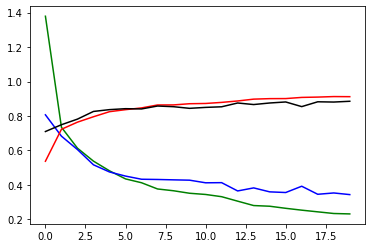

In [12]:
plt.figure(0)
plt.plot(hist.history['loss'],'g')
plt.plot(hist.history['val_loss'],'b')
plt.plot(hist.history['accuracy'],'r')
plt.plot(hist.history['val_accuracy'],'black')
plt.show()